# wrangle_act project

## 目录
- [I - 数据收集](#gather)
- [II - 数据评估](#assess)
- [III - 数据清理](#wrangling)
- [IV - 探索性数据分析](#eda)
- [V- 结论](#conclusions)

<a id='gather'></a>
### 数据收集

In [1]:
import pandas as pd
import numpy as np
import glob
import requests
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')

In [3]:
# 如果没有目录，创建目录
folder_name = 'ebert_reviews'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url ='https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response =  requests.get(url)
with open("image-predictions.tsv", 'wb') as file:#直接下载tsv到ipynb根目录
        file.write(response.content)

In [4]:
os.listdir(folder_name)

['image-predictions.tsv']

In [3]:
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

- 将这个`tweet_json.txt`文件逐行读入一个 pandas DataFrame 中，（至少）包含 tweet ID、retweet_count 和 favorite_count 字段。


In [4]:
import json
#利用python自带的函数读取Json中的内容
tweet_list=[]
with open('tweet_json.txt','r') as f:
  for row in f:
      json_dict= json.loads(row)  
      to_append= {
          'tweet_id':json_dict['id'],
          'retweet_count':json_dict['retweet_count'],
          'favorite_count':json_dict['favorite_count']
      }
      tweet_list.append(to_append)
df=pd.DataFrame(tweet_list, columns=['tweet_id','retweet_count','favorite_count'])

In [5]:
df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016


<a id='assess'></a>
### 数据评估

In [6]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
#查看有无重复的tweet_id
#因为后面的两个表需要用tweet_id来拼接，所以一定不能有重复的
twitter_archive[twitter_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [37]:
#随机显示5个数据
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2280,667393430834667520,NaN,NaN,2015-11-19 17:26:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fwed. He is a Canadian Asian Taylormad...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667393430...,8,10,Fwed,None,None,None,None
101,872668790621863937,NaN,NaN,2017-06-08 04:17:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @loganamnosis: Penelope here is doing me qu...,8.726576e+17,154767397.0,2017-06-08 03:32:35 +0000,https://twitter.com/loganamnosis/status/872657...,14,10,None,None,None,None,None
1409,699060279947165696,NaN,NaN,2016-02-15 02:38:53 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Yukon. He pukes rainbows. 12/10 magica...,NaN,NaN,NaN,https://vine.co/v/inlmMHxtqDD,12,10,Yukon,None,None,None,None
443,819347104292290561,NaN,NaN,2017-01-12 00:55:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Anna and Elsa. They fall asleep i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819347104...,12,10,Anna,None,None,None,None
536,807010152071229440,NaN,NaN,2016-12-08 23:53:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lennon. He's a Boopershnoop Pupperdoop...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/807010152...,12,10,Lennon,None,None,None,None


In [9]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [10]:
#查看评分分母错误的数据
twitter_archive[twitter_archive['rating_denominator']==150]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [11]:
twitter_archive[twitter_archive['rating_denominator']==2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [8]:
pd.set_option('max_colwidth',200)

In [8]:
#查看名字错误的数据
twitter_archive[twitter_archive['rating_denominator']==2].text

2335    This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
Name: text, dtype: object

In [135]:
#查看有多少名字是有问题的
twitter_archive.name.value_counts().head()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
Name: name, dtype: int64

In [18]:
twitter_archive[twitter_archive['name']=='a'].text

56      Here is a pupper approaching maximum borkdrive...
649     Here is a perfect example of someone who has t...
801     Guys this is getting so out of hand. We only r...
1002    This is a mighty rare blue-tailed hammer sherk...
1004    Viewer discretion is advised. This is a terrib...
1017    This is a carrot. We only rate dogs. Please on...
1049    This is a very rare Great Alaskan Bush Pupper....
1193    People please. This is a Deadly Mediterranean ...
1207    This is a taco. We only rate dogs. Please only...
1340    Here is a heartbreaking scene of an incredible...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1361    This is a Butternut Cumberfloof. It's not wind...
1368    This is a Wild Tuscan Poofwiggle. Careful not ...
1382    "Pupper is a present to world. Here is a bow f...
1499    This is a rare Arctic Wubberfloof. Unamused by...
1737    Guys this really needs to stop. We've been ove...
1785    This is a dog swinging. I really enjoyed it so...
1853    This i

In [12]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
#查看有无重复的tweet_id
image_predictions[image_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [15]:
#随机显示5个数据
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1442,775364825476165632,https://pbs.twimg.com/media/CsKmMB2WAAAXcAy.jpg,3,beagle,0.571229,True,Chihuahua,0.175257,True,Pembroke,0.034306,True
759,688804835492233216,https://pbs.twimg.com/media/CY8gWFRWUAAm1XL.jpg,3,malinois,0.199512,True,German_shepherd,0.096797,True,Saluki,0.082848,True
769,689283819090870273,https://pbs.twimg.com/media/CZDT-mZWsAEK9BH.jpg,1,Scotch_terrier,0.267979,True,affenpinscher,0.199619,True,cairn,0.127469,True
1420,771770456517009408,https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg,1,papillon,0.533180,True,collie,0.192031,True,Border_collie,0.121626,True
827,693486665285931008,https://pbs.twimg.com/ext_tw_video_thumb/69348...,1,sea_lion,0.519811,False,Siamese_cat,0.290971,False,black-footed_ferret,0.039967,False


In [28]:
#查看CSV中有没有没有图像的twitter
twitter_archive.shape[0] - image_predictions.shape[0]
#retweeted_status_id博主自己转发的只有181条，那么twitter_archive表中有100条是没有图像的

281

In [16]:
df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [64]:
#查看有无重复的tweet_id
df[df.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count


In [65]:
#随机显示5个数据
df.sample(5)

,tweet_id,retweet_count,favorite_count
2140,669942763794931712,182,533
2161,669367896104181761,171,484
1160,723179728551723008,2100,5735
472,816062466425819140,1201,0
580,800188575492947969,4555,0


#### 质量
##### `twitter_archive` 表格
- 数据缺失（很多缺失：in_reply_to_status_id，in_reply_to_user_id，retweeted_status_id，retweeted_status_user_id，retweeted_status_timestamp；较少缺失：expanded_urls）
- 错误的数据类型（tweet_id，in_reply_to_status_id，in_reply_to_user_id，retweeted_status_id，retweeted_status_user_id并不能用来进行算术运算，所以应该是str类型）
- 错误的数据类型（timestamp、retweeted_status_timestamp应该是时间类型）
- 错误的评分标准（rating_denominator分子除了10还有很多）
- 狗狗的名字并不会是a或者an
- 清除博主自己转发的`retweeted_status_id`181条
- 清除没有图片的100条

##### `image_predictions` 表格
- 错误的数据类型（tweet_id应该是str类型）
- img_num应该是分类类型
- 列名p1,p2等可以用更有描述性的列名

##### `df` 表格
- 错误的数据类型（tweet_id应该是str）

#### 清洁度
-   `twitter_archive`表中doggo、floofer、pupper、puppo应该合成一列
-  删除研究中不需要的列
-  三个表应该合成一个表

<a id='wrangling'></a>
## 数据清理

In [6]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
df_clean = df.copy()

#### `twitter_archive`： 缺少数据
##### 定义
in_reply_to_status_id，in_reply_to_user_id，retweeted_status_id，retweeted_status_user_id，retweeted_status_timestamp；expanded_urls等列存在缺失情况，由于转发等数据拿不到了，所以没有办法进行补充。


### 清洁度

####  `twitter_archive` 表格中删除掉不要的博主自己转发的行和别人转发的列以及`image_predictions_clean`表中不需要的列

#### 定义
- 删除`retweeted_status_id`含有数据的行，然后再删除掉`in_reply_to_status_id`，`in_reply_to_user_id`，`retweeted_status_id`，`retweeted_status_user_id`，`retweeted_status_timestamp`等列。
- 删除 `image_predictions_clean`表中P2和P3预测的列

#### 代码

In [7]:
#删除retweeted_status_id含有数据的行
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

In [8]:
#删除多余的列
twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_id',
                            'retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

In [9]:
image_predictions_clean.drop(['p2','p2_conf', 'p2_dog','p3','p3_conf','p3_dog'], axis=1, inplace=True)

#### 测试

In [10]:
twitter_archive_clean.shape

(2175, 12)

In [11]:
twitter_archive_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [12]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True



####  `twitter_archive` 表格中doggo、floofer、pupper、puppo应该合成一列：nickname

##### 定义
- 使用melt函数将`twitter_archive` 表格中的*doggo*、*doggo*、*pupper*和*puppo*四列合成*nickname*列

##### 代码

In [13]:
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=['tweet_id', 'timestamp', 'source', 
                                                                'text','expanded_urls', 'rating_numerator','rating_denominator', 
                                                                'name'],var_name='aaa', value_name= 'nickname')
twitter_archive_clean = twitter_archive_clean.drop('aaa', axis= 1)

In [14]:
#删除融合后的重复行
twitter_archive_clean.drop_duplicates(inplace=True)

In [15]:
#查看有无重复的行
#keep=False会输出相同的两个数据
twitter_archive_clean[twitter_archive_clean.tweet_id.duplicated(keep=False)][['tweet_id', 
                                                                            'text', 'nickname']].sort_values(by=['tweet_id'])

,tweet_id,text,nickname
1838,672160042234327040,This is Bubba. He's a Titted Peebles Aorta. Ev...,None
6188,672160042234327040,This is Bubba. He's a Titted Peebles Aorta. Ev...,pupper
1836,672205392827572224,This is Opal. He's a Royal John Coctostan. Rea...,None
6186,672205392827572224,This is Opal. He's a Royal John Coctostan. Rea...,pupper
6180,672254177670729728,This is Rolf. He's having the time of his life...,pupper
1830,672254177670729728,This is Rolf. He's having the time of his life...,None
6173,672481316919734272,Say hello to Jazz. She should be on the cover ...,pupper
1823,672481316919734272,Say hello to Jazz. She should be on the cover ...,None
6166,672594978741354496,Meet Scott. Just trying to catch his train to ...,pupper
1816,672594978741354496,Meet Scott. Just trying to catch his train to ...,None


In [16]:
twitter_archive_nick_none = twitter_archive_clean[twitter_archive_clean.tweet_id.duplicated(keep=False)][['tweet_id', 
                                                                            'text', 'nickname']].sort_values(by=['tweet_id'])

In [17]:
#删除id重复中nickname为none的数据
twitter_archive_clean.drop(twitter_archive_nick_none[twitter_archive_nick_none['nickname']== 'None'].index.tolist() ,inplace=True)

In [18]:
twitter_archive_clean.shape[0]

2187

In [19]:
twitter_archive_clean[twitter_archive_clean.tweet_id.duplicated(keep=False)][['tweet_id', 
                                                                            'text', 'nickname']].sort_values(by=['tweet_id'])

,tweet_id,text,nickname
935,733109485275860992,"Like father (doggo), like son (pupper). Both 1...",doggo
5285,733109485275860992,"Like father (doggo), like son (pupper). Both 1...",pupper
885,741067306818797568,This is just downright precious af. 12/10 for ...,doggo
5235,741067306818797568,This is just downright precious af. 12/10 for ...,pupper
781,751583847268179968,Please stop sending it pictures that don't eve...,doggo
5131,751583847268179968,Please stop sending it pictures that don't eve...,pupper
722,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",doggo
5072,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",pupper
593,781308096455073793,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",doggo
4943,781308096455073793,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",pupper


In [20]:
#替换狗狗地位有两个导致id重复的数据
twitter_archive_clean.loc[twitter_archive_clean.tweet_id.duplicated(keep = False), 'nickname']= 'multiple'

In [21]:
#删除重复id
twitter_archive_clean.drop_duplicates(inplace=True)

In [22]:
#将字符串‘None’转化掉
twitter_archive_clean.nickname = twitter_archive_clean.nickname.replace({'None': np.nan})

#### 测试

In [23]:
twitter_archive_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,nickname
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN


In [24]:
twitter_archive_clean.shape

(2175, 9)

In [25]:
twitter_archive_clean.nickname.value_counts()

pupper      224
doggo        75
puppo        24
multiple     12
floofer       9
Name: nickname, dtype: int64

In [26]:
twitter_archive_clean.tweet_id.duplicated().sum()

0


####  三个表应该合成一个表

##### 定义
- 使用merge函数将三个表合成twitter_archive_master一个表
- 注意和数据的时候删除没有图像的数据

##### 代码

In [27]:
#三个表中的id转化成str
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype('str')
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype('str')
df_clean.tweet_id = df_clean.tweet_id.astype('str')

In [28]:
#注意这里以image_predictions表为基准，可以删除没有图像的数据
twitter_archive_master = pd.merge(twitter_archive_clean, image_predictions_clean,
                           on=['tweet_id'], how='inner')

In [29]:
twitter_archive_master = pd.merge(twitter_archive_master, df_clean, on=['tweet_id'], how='left')

#### 测试

In [30]:
twitter_archive_master.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,nickname,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,8842,39492
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,6480,33786


In [31]:
twitter_archive_master.shape

(1994, 16)

In [32]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 16 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
nickname              306 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
dtypes: bool(1), float64(1), int64(5), object(9)
memory usage: 251.2+ KB


In [33]:
twitter_archive_master.tweet_id.duplicated().sum()

0

### 质量

#### 数据类型转换

##### 定义
- 将timestamp转化成时间类型
- 将img_num转化成category

##### 代码

In [34]:
#将timestamp转化成时间类型
twitter_archive_master.timestamp = pd.to_datetime(twitter_archive_master.timestamp)

In [35]:
#将img_num转化成category
twitter_archive_master.img_num = twitter_archive_master.img_num.astype('category', errors='ignore')

##### 测试

In [36]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 16 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
nickname              306 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null category
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
dtypes: bool(1), category(1), datetime64[ns](1), float64(1), int64(4), object(8)
memory usage: 237.8+ KB


#### 评分分母除了10还有很多种

##### 定义
- 将rating_numerator全部除以原来的分母再乘以10，获得新列，这样转化为以10为分母的评分机制
- 删掉不用的列和异常值

##### 代码

In [37]:
#删除分母列中含有0的那一行
twitter_archive_master.drop(twitter_archive_master[twitter_archive_master['rating_denominator']==0].index.tolist() ,
                            inplace=True)

In [38]:
twitter_archive_master['rating'] = twitter_archive_master.apply(lambda x: 10*x['rating_numerator'] / x['rating_denominator'], axis=1)

In [39]:
#删除掉不需要的rating_numerator和rating_denominator列
twitter_archive_master.drop(['rating_numerator','rating_denominator'], axis=1, inplace=True)

In [40]:
#删除极端异常值
twitter_archive_master.drop(twitter_archive_master[twitter_archive_master['rating']>=25].index.tolist() ,inplace=True)

#### 测试

In [41]:
twitter_archive_master.head(2)

,tweet_id,timestamp,source,text,expanded_urls,name,nickname,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count,rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,8842,39492,13.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,6480,33786,13.0


In [42]:
twitter_archive_master.rating.value_counts()

12.000000    454
10.000000    421
11.000000    402
13.000000    261
9.000000     151
8.000000      95
7.000000      51
14.000000     35
5.000000      34
6.000000      32
3.000000      19
4.000000      15
2.000000      10
1.000000       4
0.000000       2
8.181818       1
6.363636       1
Name: rating, dtype: int64

#### 狗狗名字很多取到不对的名字

##### 定义
- 狗狗名字为a和an的大部分是提取的时候出现的问题，查看原来的text，多数是没有名字的
- 所以将名字为a、None和an的替换成np.nan
- 即使用正则重新读取名字也可能会造成名字很多取错，因为大家提出名字的方式各有不同。

##### 代码

In [45]:
twitter_archive_master.name = twitter_archive_master.name.replace({'a': np.nan, 'an': np.nan, 'None': np.nan})

#### 测试

In [46]:
twitter_archive_master.name.value_counts().head()

Charlie    11
Oliver     10
Cooper     10
Lucy       10
Tucker      9
Name: name, dtype: int64

#### p1,p1_conf和p1_dog改成更有描述性的列名

##### 定义
- 使用rename将这三列的名称进行修改

##### 代码

In [47]:
twitter_archive_master = twitter_archive_master.rename(columns={'p1': 'prediction', 
                                                                'p1_conf': 'prediction_PR', 'p1_dog': 'prediction_dog' })

#### 测试

In [48]:
twitter_archive_master.head(2)

,tweet_id,timestamp,source,text,expanded_urls,name,nickname,jpg_url,img_num,prediction,prediction_PR,prediction_dog,retweet_count,favorite_count,rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,8842,39492,13.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,6480,33786,13.0


In [49]:
#将整理好的数据集存成CSV
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

<a id='eda'></a>
## 探索性数据分析

### 研究问题 1 :   
#### `favorite_count`点赞数与哪一个相关性最高？

In [50]:
df_1 = twitter_archive_master.copy()

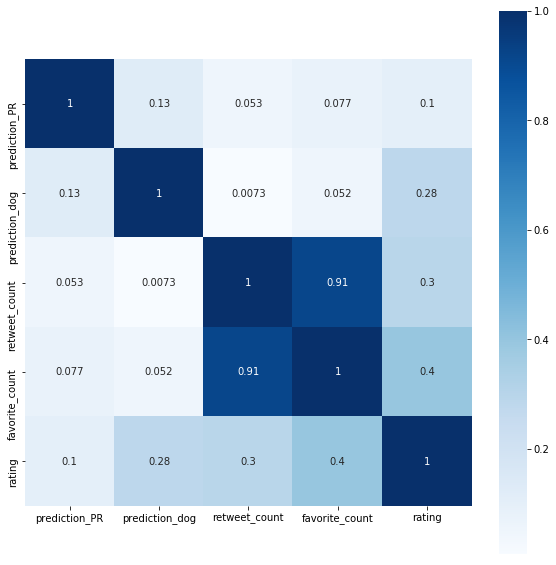

In [52]:
#输出热力图
dfData = df_1.corr()
plt.subplots(figsize=(10, 10)) # 设置画面大小
sns.heatmap(dfData, annot=True, vmax=1, square=True, cmap="Blues")
plt.show()

### 分析与结论
- 从上图可以很容易的看出来`favorite_count`与`retweet_count`有极高的相关性，这与现实情况也相符，一般点赞多的会比计较有趣，大家也愿意转发给别人看。
- 意外的是，`favorite_count`与`rating`相关性貌似有一定的相关性，到底是怎样的相关性呢，在这个热力图中不明显，我们后续接着分析。

### 研究问题 2:   
#### `favorite_count`点赞数与`rating`有无相关性？
>研究这个题目的原因是我想看下被自己主人非常钟爱的狗狗（rating得分高），到底会不会被其他人也喜欢（点赞数高）？

In [53]:
df_2 = twitter_archive_master.copy()

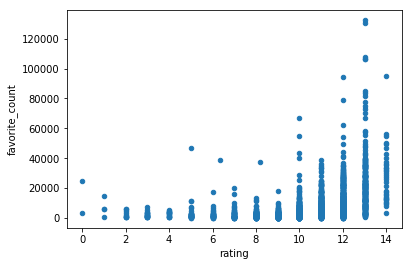

In [54]:
df_2.plot(x = 'rating', y = 'favorite_count', kind = 'scatter')

### 分析与结论
- 从上图可以很容易的看出来`favorite_count`与`rating`有一定相关性的，图形大致符合一个负偏态。
- 也就是说你非常喜欢自己的狗狗，给到高分，就有可能得到更多的点赞；想反的要是你自己都不喜欢自己的狗狗，肯定别人也不会喜欢
- 从图形中可以看出得分在13分左右的狗狗比较受大家的青睐，毕竟自己的主人喜欢，也不过分吹捧，这样会比较招大家喜欢。

### 研究问题 3:   
#### 什么时间段（哪年哪月）这个活动达到的热度的顶峰。
>我们需要找出哪一个月的`favorite_count`点赞数的均值最高？

In [55]:
df_3 = twitter_archive_master.copy()

In [56]:
#列出年列和月列
df_3['year'] = pd.to_datetime(df_3['timestamp'])
df_3['month'] = pd.to_datetime(df_3['timestamp'])

In [57]:
#将这两列转化成为想要的形式
df_3['year'] = df_3['year'].dt.year
df_3['month'] = df_3['month'].dt.month

In [58]:
#删除不必要的列
df_3 = df_3.drop(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
                 'name', 'nickname', 'jpg_url', 'img_num', 'prediction', 'prediction_PR',
                 'prediction_dog', 'retweet_count', 'rating'], axis = 1)

In [59]:
df_3.head()

,favorite_count,year,month
0,39492.0,2017.0,8.0
1,33786.0,2017.0,8.0
2,25445.0,2017.0,7.0
3,42863.0,2017.0,7.0
4,41016.0,2017.0,7.0


In [60]:
#引用pm2.5试学项目中的函数
def filter_data(data, condition):
    """
    Remove elements that do not match the condition provided.
    Takes a data list as input and returns a filtered list.
    Conditions should be a list of strings of the following format:
      '<field> <op> <value>'
    where the following operations are valid: >, <, >=, <=, ==, !=
    
    Example: ["duration < 15", "start_city == 'San Francisco'"]
    """

    # Only want to split on first two spaces separating field from operator and
    # operator from value: spaces within value should be retained.
    field, op, value = condition.split(" ", 2)
    
    # check if field is valid
    if field not in data.columns.values :
        raise Exception("'{}' is not a feature of the dataframe. Did you spell something wrong?".format(field))

    # convert value into number or strip excess quotes if string
    try:
        value = float(value)
    except:
        value = value.strip("\'\"")

    # get booleans for filtering
    if op == ">":
        matches = data[field] > value
    elif op == "<":
        matches = data[field] < value
    elif op == ">=":
        matches = data[field] >= value
    elif op == "<=":
        matches = data[field] <= value
    elif op == "==":
        matches = data[field] == value
    elif op == "!=":
        matches = data[field] != value
    else: # catch invalid operation codes
        raise Exception("Invalid comparison operator. Only >, <, >=, <=, ==, != allowed.")
    
    # filter data and outcomes
    data = data[matches].reset_index(drop = True)
    return data

In [61]:
#引用pm2.5试学项目中的函数
def reading_stats(data, filters = [], verbose = True):
    """
    Report number of readings and average PM2.5 readings for data points that meet
    specified filtering criteria.
    """

    n_data_all = data.shape[0]

    # Apply filters to data
    for condition in filters:
        data = filter_data(data, condition)

    # Compute number of data points that met the filter criteria.
    n_data = data.shape[0]

    # Compute statistics for PM 2.5 readings.
    FC_mean = data['favorite_count'].mean()
    FC_qtiles = data['favorite_count'].quantile([.25, .5, .75]).as_matrix()
    
    # Report computed statistics if verbosity is set to True (default).
    if verbose:
        if filters:
            print('There are {:d} readings ({:.2f}%) matching the filter criteria.'.format(n_data, 100. * n_data / n_data_all))
        else:
            print('There are {:d} reading in the dataset.'.format(n_data))

        print('The average readings of favorite_count is {:.2f}'.format(FC_mean))
        print('The median readings of favorite_count is {:.2f}'.format(FC_qtiles[1]))
        print('25% of readings of favorite_count are smaller than {:.2f}'.format(FC_qtiles[0]))
        print('25% of readings of favorite_count are larger than {:.2f}'.format(FC_qtiles[2]))
        sns.boxplot(data['favorite_count'], showfliers=False)
        plt.title('Boxplot of favorite_count of filtered data')
        plt.xlabel('favorite_count ')

    # Return three-number summary
    return data

There are 357 readings (17.25%) matching the filter criteria.
The average readings of favorite_count is 24083.43
The median readings of favorite_count is 20840.00
25% of readings of favorite_count are smaller than 13909.00
25% of readings of favorite_count are larger than 28429.00


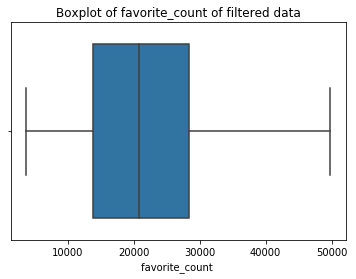

In [62]:
df_2017 = reading_stats(df_3, [ "year == 2017"])

There are 970 readings (46.88%) matching the filter criteria.
The average readings of favorite_count is 7719.77
The median readings of favorite_count is 4880.50
25% of readings of favorite_count are smaller than 3138.75
25% of readings of favorite_count are larger than 9099.00


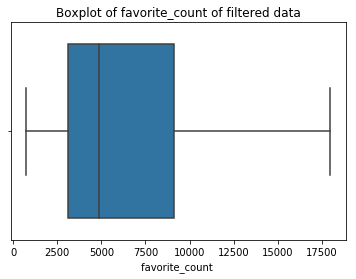

In [63]:
df_2016 = reading_stats(df_3, [ "year == 2016"])

There are 661 readings (31.95%) matching the filter criteria.
The average readings of favorite_count is 2481.42
The median readings of favorite_count is 1245.00
25% of readings of favorite_count are smaller than 638.00
25% of readings of favorite_count are larger than 2295.00


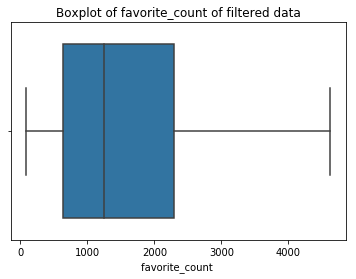

In [64]:
df_2015 = reading_stats(df_3, [ "year == 2015"])

In [65]:
#引用pm2.5试学项目中的函数
def univariate_plot(data, key = '', color = 'blue'):
    """
    Plot average PM 2.5 readings, given a feature of interest
    """
    
    # Check if the key exists
    if not key:
        raise Exception("No key has been provided. Make sure you provide a variable on which to plot the data.")
    if key not in data.columns.values :
        raise Exception("'{}' is not a feature of the dataframe. Did you spell something wrong?".format(key))

    # Create plot
    plt.figure(figsize=(8,6))
    data.groupby(key)['favorite_count'].mean().plot(kind = 'bar', color = color)
    plt.ylabel('Average of favorite count)')
    plt.title('Average Favorite Count Reading by {:s}'.format(key), fontsize =14)
    plt.show()
    return None

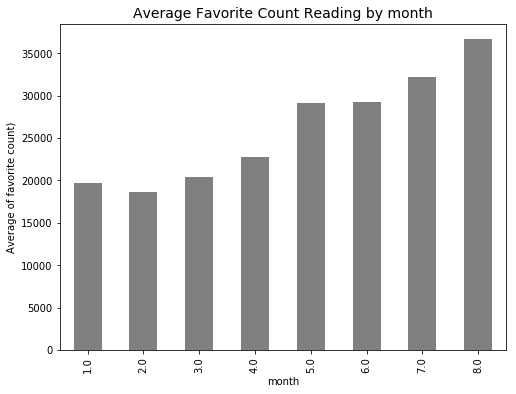

In [66]:
univariate_plot(df_2017 , 'month', 'grey')

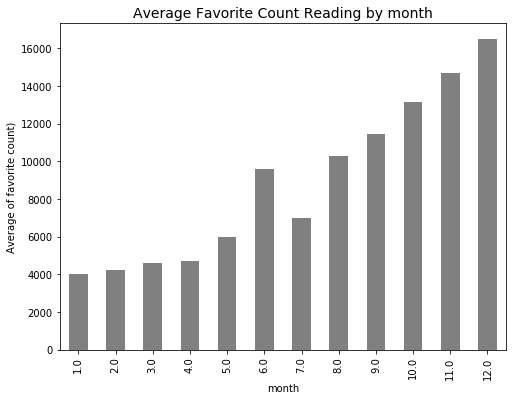

In [67]:
univariate_plot(df_2016 , 'month', 'grey')

### 分析与结论
- 从三张箱线图可以看出，这个活动虽然始发于2015年，但是直到2018年才是真正大火起来，因为2016年一共有1310条推特，点赞数的均值却比2017年466条推特的均值少太多。
- 结合后面的柱状图可以得出，从2016年7月开始，这个活动就持续上升，一直延续到2017年9月，由于后面数据看不到了，但是估计上升态势应该还在持续。
- 由此可得出，从目前数据集来看最高的点赞月是2017年9月。
- 为何一个活动可以持续性的病毒式传播，这个活动可以作为栗子来研究！


<a id='conclusions'></a>
## 结论
- 首先需要声明这次数据分析的数据清洗部分，可能不能完全清洗干净，所以可能会影响到后续的可视化分析阶段，但是我已经尽量避免使用不易清洗干净的数据了；
- 与`favorite_count`相关性最高的是`retweet_count`， 有趣的是`favorite_count`也许与`rating`也有一定的相关性，但更细致的情况在热力图中看不出来，所以再第二年问中再细致分析。
- 狗狗得分（rating）在13分左右的狗狗比较受大家的青睐，毕竟自己的主人喜欢，也不过分吹捧，这样会比较招大家喜欢，而得分过低的狗狗大家是不会太去关注；
- 这个活动虽然始发于2015年，但是直到2018年才是真正大火起来，从2016年7月开始，这个活动的热度就持续上升，一直延续到2017年9月，由于后面数据看不到了，但是估计上升态势应该还在持续；
- 这是一个活动策划者值得深挖的好例子。

In [55]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act_lxl.ipynb'])

0